# R4.04: Méthode d'optimisation

Le début de ce TP est tiré de "Machine learning avec scikit-learn" d'Aurélien Géron.

##  Courte introduction au cours:

Le but de ce cours est de donner:
- une introduction à la notion d'*apprentissage* à la base de l'intelligence artificielle;
- une introduction à la résolution de *programme linéaire*. Il s'agit de problème d'optimisation avec des contraintes sur les variables.

Que vient faire l'optimisation dans l'intelligence artificielle ? 

Ce sont les méthodes d'optimisation qui permettent à une machine d'*apprendre*. Prenons l'exemple des procédures actuelles d'apprentissage dans le parcours scolaire. Vous avez plusieurs *enseignements* qui constitue en soit un énorme jeu de données. Pour mesurer votre compréhension/assimilation de ces données, on vous attribue une *note d'évaluation* que vous souhaitez voir la plus élévée possible.

Nous allons procéder de la même manière avec l'ordinateur. L'analogue des enseignements sera un *jeu de données* (qu'il faut rendre compréhensible pour l'ordinateur) et l'analogue de la note sera une *mesure de perfomance/ mesure d'erreur*.
Si nous avons une *mesure de performance* on donnera comme but à la machine de maximiser cette mesure tandis qu'en présence d'une mesure d'erreur on demandera qu'elle la minimise. 

**Bilan:** tout ceci revient à un problème d'optimisation.

Dans le cours, la bibliothèque que nous utiliserons le plus souvent est la bibliothèque *scikit-learn* dont le nom pour l'import est est *sklearn*:

In [1]:
import sklearn

## TP 1: Arbres de décision et forêts aléatoires

Le premier problème que nous pouvons traiter avec la machine en utilisant des méthodes d'apprentissages est le problème de *classification*. 

Etant donné un jeu de données et des *classes/familles* disponibles, le but du programme sera de déterminer à quelle classe/famille une entrée de nos données appartient-elle.

Par exemple, les données peuvent-être des photos de chat et de chiens et les classes peuvent-être chien, chat et poisson.

**But**: une fois que notre programme est entraîné et testé sur les données d'entraînements, nous souhaitons l'utiliser sur d'autres images dont nous ne connaissons pas la classification afin d'effectuer une *prédicition*. 

Pour résoudre ce problème, dans ce TP, nous nous appuierons sur les *arbres de décisions* et les *forêts aléatoires*. Dans un premier temps, nous allons nous focaliser sur les arbres de décisions.

Le but de ce TP sera de former nos arbres à la reconnaissance de nombres manuscrits. Ce test s'appelle *Modified National Institute of Standards and Technology dataset* abrégé MNIST.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Chargement des données

#### 1.a. Lecture des données


Pour pouvoir faire apprendre une notion à une machine, nous devons avoir besoin d'un jeu de donnée. Ce jeu permettra à notre machine d'apprendre convenablement à partir d'exemples.

Nous utiliserons principalement des jeux de données en accès libres disponibles dans les librairies de python afin d'entraîner nos programmes.

Dans un premier temps, nous allons nous entraîner sur un jeu de données de taille 150 constitué de mesures effectués sur des fleurs. Le but est de déterminer en fonction de ces données à quelle espèce ces fleurs appartiennent-elles parmi: *iris virnica*,*iris versicolor* et *iris setosa*.

In [1]:
from sklearn.datasets import load_iris

iris=load_iris(as_frame=True)
#print(iris)

Nous stockons ensuite ces données dans des listes exploitables. Dans *x_iris* nous stockons les données, tandis que dans $y_{\text{iris}}$ nous stockons les types cibles:
- $0$ pour *iris setosa*;
- $1$ pour *iris veriscolor*;
- $2$ pour *iris virginica*;

Pour simplifier nos données, nous ne considérerons que les données concernant les pétales. 

In [7]:
X_iris=iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris=iris.target
#print(X_iris, y_iris)

#### 1.b. Représentation des données

Lors de la phase d'apprentissage de notre arbre, nous serons amené à contrôler ses savoirs. Pour cela, nous allons tenter (ce n'est pas toujours possible) de représenter les données graphiquement afin d'avoir un contrôle visuel et de mieux comprendre ce qu'il ce passe.

**TODO:** représenter les données sous la forme d'un nuage de point en utilisant la bibliothèque *matplotlib.pyplot*.
Représenter *iris setosa* avec des carrées, *iris_verticolor* avec des triangles et *iris virginica* avec des cercles.

In [3]:
import matplotlib.pyplot as plt

### 2. Entraînement d'un arbre de décision

#### 2.a. Qu'est ce qu'un arbre de décision ?

Un *arbre de décision* est un arbre (au sens des graphes) dont les noeuds sont remplis de tests conditionnels à effectuer.  Si ce test est vrai, on visite le fils gauche de ce noeud sinon on visite le fils droit de ce noeud jusqu'à tombé sur une *feuille* de l'arbre.

Pour générer de tels arbres nous utiliserons la bibliothèque *sklearn.tree*.

Pour générer l'arbre, l'algorithme minimise la quantité suivante:
$$
J(k,t_k)=\frac{m_{l}}{m} \mathrm{Imp}_{l} + \frac{m_{r}}{m} \mathrm{Imp}_{r}
$$
où $m$ est le nombre de données, $k$ le numéro de la variable $v_k$ considérée dans l'échantillon et:
- $m_{l}$ est le nombre de données telles que la donnée $v_k\leq t_k$
- $m_{r}$ est le nombre de données telles que la donnée $t_k\leq v_k$
- $\mathrm{Imp}_{l}$ et $\mathrm{Imp}_{r}$ sont des mesures d'impuretés qui peut soit être une impureté de Gini ou une entropie.

Une fois cette optimisation effectuée, la procédure crée un noeud avec le test conditionnel sur la variable $v_k\leq t_k.$ 

Puis, il procède ainsi de suite à chaque étape avec le nouveau jeu de données. Cette méthode cherche après à avoir l'approximation optimale à chaque étape de l'algorithme. Il rentre donc dans la famille des algorihtmes dits *gloutons*.

#### 2.b. Fonctionnement en pratique

En pratique, nous utiliserons la bibliothèque suivante pour généré des arbres de décisions.

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
tree_clf=DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

Pour visualiser l'arbre obtenu, nous utilisons la fonction *export_graphviz()* de la biblitothèque *sklearn.tree*:

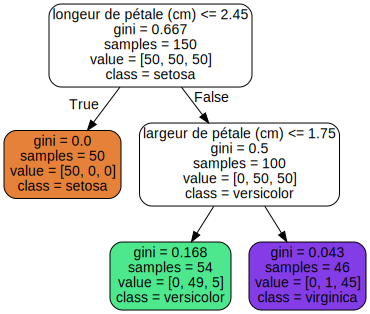

In [15]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file="iris_tree.dot", feature_names=["longeur de pétale (cm)","largeur de pétale (cm)"], 
                class_names=iris.target_names,
               rounded=True, filled=True) 

from graphviz import Source
Source.from_file("iris_tree.dot")

#### 2.c. Visualisation des zones de choix de l'arbre

**TODO**: Tracer sur un graphe, en utilisant la bibliothèque *matplotlib*, le jeu de données et les zones où l'arbre donne comme réponse *iris setosa*, *iris versicolor* et *iris virginica*.

#### 2.d. Augmentation de la profondeur

**TODO**: Construire un arbre similaire à ce qui a été fait précédemment en prenant *max_depth=3* et en retirant la condition *max_depth*. Que constatez-vous sur la forme de l'arbre ?

**TODO**: Pour chacun des arbres de décision, tracer sur un même graphe le jeu de données et colorier les points en fonction de la prédicition donnée par la machine. 

*Remarque:* pour effectuer une prédiction sur un jeu de données, on peut utiliser la commande *.predict* sur des données pour connaître l'avis de l'arbre.

On constate qu'en ne donnant pas de contrainte sur la profondeur de l'arbre, l'arbre commet de moins en moins d'erreur. 

#### 2.e. Retourner une probabilité

On peut demander à l'arbre de décision à ce qu'il ne retourne pas une classe de fleur mais une probabilité pour que la classe de fleur soit la bonne. Pour cela, on utilise *.predict_proba()*.

**TODO**: Calculer la probabilité que la donnée $[5,1.5]$ soit une iris virginica.

*Remarque:* la probabilité donnée est calculé en fonction des proportions de chaque classe dans les noeuds terminaux de l'arbre de décision.

Dans cet exemple, on constate qu'avec ces données l'arbre de décision sit que la fleur a une 1 chance sur 3 d'être une iris versicolor et 2 chance sur 3 d'être une iris virginica.

### 3. Arbres de décision et test MNIST

Maintenant que nous avons fait nos armes sur les fleurs, nous allons nous attaquer à un test bien connu en *apprentissage* sur la base de données *Modified National Institute of Standards and Technology* pour entraîner un système à la reconnaissance de l'écriture manuscrite des chiffres.
Ces images sont des carrés de côté $28$ pixels ayant des valeurs entières comprises entre $0$ et $255$ pour déterminer leur niveau de gris.

Nous proposons ici de traiter le problème en utilisant des arbres de décisions.

#### 3.1 Chargement des données

Le test MNIST est facilement téléchargeable sous un format que Python comprends correctement en utilisant la bibliothèque *keras*:

In [10]:
import numpy as np
# paquet simplifié pour tensorflow
from tensorflow import keras

In [11]:
# Bibliothèque d'exemple
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Taille des images (28, 28)
Nombre d'images d'entrainement 60000
Nombre d'images de test 10000


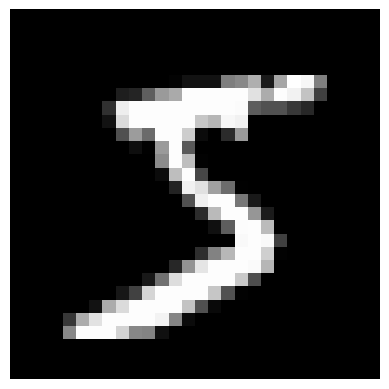

5


In [12]:
# importation des données
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()
# Taille de la première image (et des autres en théorie)
print("Taille des images",np.shape(X_train_data[0]))

# Longueur du vecteur d'image d'entrainement donc nombre 
# d'images d'entrainement
print("Nombre d'images d'entrainement",len(X_train_data))

# Nombre d'images de test
print("Nombre d'images de test",len(X_test_data))

# Première matrice
img = X_train_data[0]

# Affichage de la première image
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()
print(Y_train_data[0])

In [65]:
# matrice de la première image
#print(X_train_data[0])

Pour simplifier l'exploitation des données, nous allons assimiler un tableau $28\times 28$ à une liste de $784$ données via la fonction *.reshape* de numpy.


In [43]:
# nombre d'images
N = len(X_train_data)

# On crée un tableau contenant N vecteurs de taille 784 représentant les images
X_train = np.reshape(X_train_data,(N,784))
print(np.shape(X_train))

(60000, 784)


A partir de ces nouvelles, données, nous pouvons maintenant utilisé les arbres de décisions.

#### 3.2 Entraînement de l'arbre et évaluation de performance sur l'ensemble d'entraînement

**TODO**: Créer un premier arbre de décision avec une profondeur maximale de $5$ étages et évaluer sa performance pour classifier ces images

**TODO**: Créer un second arbre de décision avec une profondeur maximale de $10$ étages et évaluer sa performance pour classifier ces images

**TODO**: Créer un troisième arbre de décision avec une profondeur maximale de $20$ étages et évaluer sa performance pour classifier ces images

Au vue de la taille importante des données et de la quantité de paramètres à prendre en compte, il n'est plus envisageable d'afficher le graphe de l'arbre comme fait précédemment.

#### 3.2.a Première évalution de perfomance: la matrice de confusion

Nous allons donc utiliser d'autres outils à notre disposition comme la *matrice de confusion* en utilisant la commande *confusion_matrix* qui prends deux entrées:
- la première est une liste contenant les classes cibles;
- la seconde est une liste contenant les classes prédites par l'apprenti numérique.

La $j$-ème coefficient de la $i$-ème ligne de la matrice indique à quelle fréquence le chiffre $i$ a été prédit comme étant le chiffre $j$ par notre méthode d'apprentissage.

**TODO:** Donner la matrice de confusion des arbres que nous venons d'entraîner pour le test MNIST avec *max_depth=5,10* et *20*. Interpréter les résultats.

In [15]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

pass

Voici un code ci-dessous pour afficher la matrice de confusion de l'arbre:

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1','2','3','4','5','6','7','8','9'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

#### 3.2.b La précision

Pour introduire la *mesure de précision*, nous définissons quelques termes de vocabulaire à propos d'un test répondant *Positif* ou *Négatif*:
- les "vrais négatifs" (VN) sont des données sur lesquelles le test réponds *Négatif* et la donnée est effectivement *Négative*; 
- les "vrais positifs" (VP) sont des données sur lesquelles le test réponds *Positif* et la donnée est effectivement *Positive*;
- les "faux négatifs" (FN) sont des données sur lesquelles le test réponds *Positif* et la donnée est *Négative*; 
- les "vrais négatifs" (VN) sont des données sur lesquelles le test réponds *Négatif* et la donnée est *Positive*.

La *mesure de précision* de ce test est alors la quantité:
$$
\text{Précision}=\frac{|VP|}{|VP|+|FP|}.
$$

**TODO**: Calculer la précision de l'arbre entraîné sur les données qui sont des $1, 8$ et des $5$.

*Remarque:* on pourra soit implémenter soit la fonction soit utiliser la fonction *precision_score* de *sklearn.metrics*.

In [145]:
from sklearn.metrics import precision_score

*Remarque:* Notez que la précision est maximale dès qu'il n'y a plus de faux positifs (en revanche, on peut avoir beaucoup de faux négatifs).

#### 3.2.c Le rappel

La *mesure de rappel* de ce test est uen quantité parente à la précision:
$$
\text{Rappel}=\frac{|VP|}{|VP|+|FN|}.
$$

**TODO**: Calculer la précision de l'arbre entraîné sur les données qui sont des $1, 8$ et des $5$.

*Remarque:* on pourra soit implémenter soit la fonction soit utiliser la fonction *recall_score* de *sklearn.metrics*.

In [177]:
from sklearn.metrics import recall_score

*Remarque:* pour avoir un meilleur score de rappel, il suffit de réduire le nombre de *faux négatifs*.

#### 3.2.d Le score F1

Le *score F1* est un compromis entre la précision et le rappel donné par:
$$
F_1=2\times\frac{\text{précision}\times \text{rappel}}{\text{précision}+ \text{rappel}}.
$$

**TODO**: Calculer le score F1 pour les exemples précédents. 

*Remarque*: on utilisera la commande *f1_score* de la bibliothèque *sklearn.metrics* pour cela.

In [181]:
from sklearn.metrics import f1_score

#### 3.3 Vérification sur l'ensemble de tests

Une fois que notre arbre a bien appris les données que nous lui avons donné, nous souhaitons l'évaluer sur un ensemble test pour le mettre en fonction. Il est donc nécesssaire d'avoir deux jeux de données. Un premier pour entraîner les arbres et un second pour les tester et vérifier qu'il n'a pas appris par coeur les données.

Une fois que notre arbre a appris à partir des données d'entraînements, il est nécessaire de *valider* le prédicteur que vous venons de créer sur des données que ce derniers n'a *jamais* vu.

En effet, ce test est nécessaire car nous ne voulons pas que le prédicteur ait appris par coeur l'ensemble de données. Ceci s'appelle *surapprentissage* (overfitting en anglais).
En effet, un test ayant appris par coeur ses données sera *extrêmement mauvais* sur l'ensemble de tests. 

De même, si le test n'a pas assez appris de l'ensemble de tests, nous serons dans un cas de *sous-apprentissage* et le prédicteur sur l'ensemble des tests sera également mauvais.

#### 3.3.a Matrice de confusion sur l'ensemble de tests

**TODO**: Calculer la *matrice de confusion* de l'arbre de décision du test MNIST à moins de $5$ couches sur l'ensemble de tests.

**TODO**: Calculer la *matrice de confusion* de l'arbre de décision du test MNIST à moins de $10$ couches sur l'ensemble de tests.

#### 3.3.b Un exemple de surapprentissage/overfitting


**TODO**: Calculer la matrice de confusion de l'arbre de décision à $20$ étages et comparer avec les précédentes.

### 4. Les arbres de décision pour la régression

Un arbre de décision peut aussi contribuer à des tâches de *régression*, il s'agit de chercher d'approcher un jeu de données. Par exemple, on peut chercher un prédicteur pour prévoir des valeurs d'une mesure physique (qui sont chères) en fonction d'un jeu de données déjà établi.

#### 4.1 Les données

Nous allons utiliser des points situés sur une courbe ayant l'allure d'une fonction trigonométrique en y ajoutant du bruit. En effet, les mesures physiques ne sont pas exactes car elles sont soumises à la précisicion des instruments utilisés.

Pour entraîner des arbres à des tâches de régressions, nous utilisons la commande *DecisionTreeRegressor* de la bibliothèque *sklearn*.

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

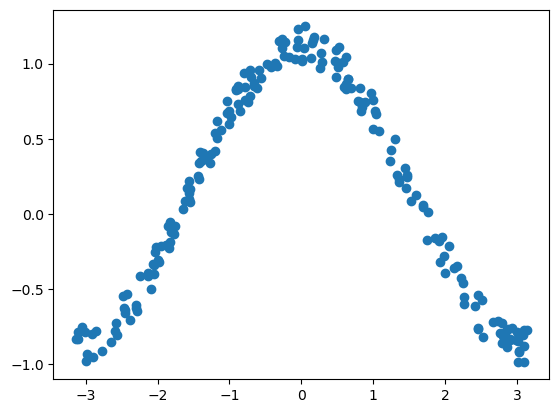

In [11]:
np.random.seed(100)
#On tire des abcisses au hasard
X_cos=np.random.rand(200,1)*2*np.pi-np.pi
# On ajoute un petit bruit aux ordonnées
Y_cos=np.cos(X_cos) + 1/4*np.random.rand(200,1)

plt.plot(X_cos,Y_cos,'o')
plt.show()

#### 4.b Entraînement des arbres

**TODO**: Entraîner puis représenter un arbre de décision pour effectuer de la régression sur le jeu de données présenté ci-dessus.

*Remarque:* dans le cadre de la régression, la fonctionnelle à optimiser est la somme des carrés des erreurs. C'est une approximation par les *moindres carrés*/*mean square error*.

**TODO**: Représenter sur une fenêtre le jeu de points trouvé et les approximations trouvées par l'arbre.